# CHECK CIRCUIT

### PARAMETERS

Perform imports and define benchmark parameters.

In [1]:
from multiprocessing import Pool, cpu_count
from src.input_circuit.input_f import generate_circuit_file, file_to_circuit


num_circuits = 3
size = 6
input_gen_processors = 10

input_directory = rf"resources\algorithm_check"
input_file_prefix = "Circuit"

section_sizes = [5, 6]
benchmark_file_fieldnames = ['size', 'run', 'section_size', 'process_time', 'initial_rss', 'final_rss']
benchmark_processors = 10

output_directory = "resources\section_size_comparison"
benchmark_file_prefix = "BenchmarkSectionSize"

print(f"There are {cpu_count()} threads available on this machine.")

There are 12 threads available on this machine.


### INPUT GENERATION

Generate some matrices and save them to files.

In [2]:
argument_pair_list = [(size, rf"..\{input_directory}\{input_file_prefix}_{size}_{i}.txt") for i in range(1, num_circuits+1)]

print(argument_pair_list)

print(f"Generating {num_circuits} circuits of size {size} ...")

#soize, namee = argument_pair_list[0]

#print(namee)

#generate_circuit_file(soize, namee)

if __name__ ==  '__main__':
    with Pool(processes = input_gen_processors) as pool:
        pool.starmap(generate_circuit_file, argument_pair_list)

print(f"Saved {num_circuits} matrices of size {size} in '{input_directory}'.")

[(6, '..\\resources\\algorithm_check\\Circuit_6_1.txt'), (6, '..\\resources\\algorithm_check\\Circuit_6_2.txt'), (6, '..\\resources\\algorithm_check\\Circuit_6_3.txt')]
Generating 3 circuits of size 6 ...
Saved 3 matrices of size 6 in 'resources\algorithm_check'.


### GET FILES TO BENCHMARK

Find relevant files and sort them.

In [3]:
import src.input.input_files as imp

input_file_names = imp.get_txt_files(rf"..\{input_directory}", f"{input_file_prefix}_")
input_file_names.sort(key = lambda file_name: imp.extract_numbers(file_name, r'_\d+_', r'_\d+\.'))

print(input_file_names)
print(f"Number of files to benchmark: {len(input_file_names)}")

['Circuit_3_1.txt', 'Circuit_3_2.txt', 'Circuit_3_3.txt', 'Circuit_6_1.txt', 'Circuit_6_2.txt', 'Circuit_6_3.txt', 'Circuit_10_1.txt', 'Circuit_10_2.txt', 'Circuit_10_3.txt']
Number of files to benchmark: 9


In [23]:

circuit, size, run = file_to_circuit(input_directory, input_file_names[3])

print(circuit)

human_circuit = [(left + 1, right + 1) for left, right in circuit]

print(human_circuit)

from src.tikz.tikz_gen import circuit_to_tikz_file, circuit_to_tikz_string

#file_name = rf"../resources/tikz_pictures/first_picture"


#print(circuit_to_tikz_file(size, circuit, file_name))

#test_string = circuit_to_tikz_string(size, circuit)

#print(test_string)

[(2, 3), (4, 2), (2, 1), (5, 2), (5, 2), (5, 3), (2, 0), (1, 2), (5, 1), (3, 0), (4, 3), (4, 3), (0, 2), (2, 3), (1, 5), (4, 5), (1, 2), (2, 4), (0, 1), (1, 4), (4, 0), (3, 1), (0, 5), (2, 1), (2, 1), (4, 2), (4, 5), (3, 2), (5, 1), (4, 2), (1, 3), (4, 0), (4, 2), (4, 0), (0, 2), (5, 0)]
[(3, 4), (5, 3), (3, 2), (6, 3), (6, 3), (6, 4), (3, 1), (2, 3), (6, 2), (4, 1), (5, 4), (5, 4), (1, 3), (3, 4), (2, 6), (5, 6), (2, 3), (3, 5), (1, 2), (2, 5), (5, 1), (4, 2), (1, 6), (3, 2), (3, 2), (5, 3), (5, 6), (4, 3), (6, 2), (5, 3), (2, 4), (5, 1), (5, 3), (5, 1), (1, 3), (6, 1)]


In [7]:
from src.tikz.tikz_gen import circuit_to_tikz_file, circuit_to_tikz_string

file_name = rf"../resources/tikz_pictures/first_picture"

#size = 3
#circuit = [(5,4),(1,2),(4,2),(6,3),(5,3),(5,4),(6,5),(3,4),(4,3),(4,6),(3,5),(2,3),(1,2),(1,5),(1,4)]
#circuit = [(1,0), (1,2), (2,1), (1,2)]


tikz = circuit_to_tikz_file(size, human_circuit, file_name)

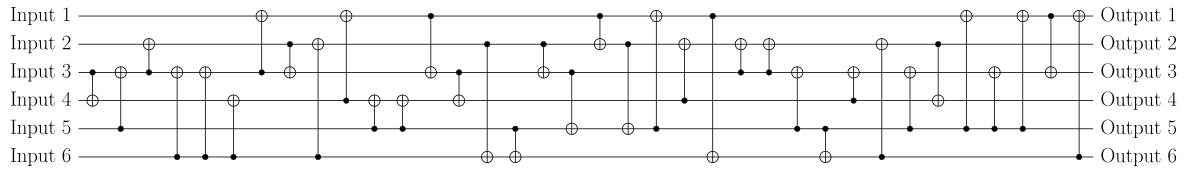

In [17]:
from IPython.display import SVG

import os

file_name = "first_picture"

command_string = f"wsl tikztosvg -p tikz-cd -p xfrac /mnt/c/Dev/cnot_synthesis/resources/tikz_pictures/{file_name}.tikz > /dev/null 2>&1"

os.system(command_string)

#!wsl tikztosvg -p tikz-cd -p xfrac /mnt/c/Dev/cnot_synthesis/resources/tikz_pictures/first_picture.tikz > /dev/null 2>&1

SVG(r"C:\Dev\cnot_synthesis\resources\tikz_pictures\first_picture.svg")

In [31]:
from src.algorithm.vanilla.cnot_synthesis import cnot_synthesis
from src.algorithm.execution import check_and_run
from src.input_circuit.input_gen import circuit_to_matrix

input_matrix = circuit_to_matrix(size, circuit)

out_mat, circuit_out, non_singular = check_and_run(cnot_synthesis, input_matrix, 2)

print(circuit_out)


file_name = rf"../resources/tikz_pictures/first_picture2"
tikz2 = circuit_to_tikz_file(size, circuit_out, file_name)

[(5, 2), (6, 2), (3, 1), (3, 2), (4, 3), (6, 4), (6, 5), (4, 6), (3, 4), (3, 5), (2, 3), (3, 2), (1, 4), (1, 3), (3, 1), (3, 5), (1, 2)]


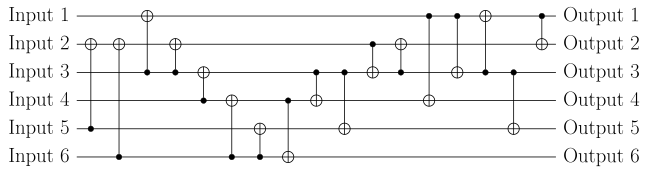

In [32]:
from IPython.display import SVG

import os

file_name = "first_picture2"

command_string = f"wsl tikztosvg -p tikz-cd -p xfrac /mnt/c/Dev/cnot_synthesis/resources/tikz_pictures/{file_name}.tikz > /dev/null 2>&1"

os.system(command_string)

#!wsl tikztosvg -p tikz-cd -p xfrac /mnt/c/Dev/cnot_synthesis/resources/tikz_pictures/first_picture.tikz > /dev/null 2>&1

SVG(r"C:\Dev\cnot_synthesis\resources\tikz_pictures\first_picture2.svg")